# Thai Chunk Parser

This tutorial demonstrates how to use the `chunk_parse` function from the PyThaiNLP library for parsing Thai text into phrases. We will use a chunking model trained on ORCHID++ corpus. 

Read more: https://github.com/PyThaiNLP/pythainlp/pull/524

We will need the following libraries and packages: 
- PyThaiNLP
- NLTK (to preprocess chunk data for visualization)
- svgling (for visualization)
- python-crfsuite

In [1]:
!pip install pythainlp svgling nltk python-crfsuite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 8.4 MB/s eta 0:00:00


We need to import the following modules and functions:
- `word_tokenize`  – this function takes a Thai text and returns a list of tokenized words
- `pos_tag` – this function takes a list of tokenized words and marks them with part-of-speech (POS) tags
- `chunk_parse` – this function takes words with their POS tags and marks them with inside-outside-beginning (IOB) tags
- `conlltags2tree` – this function is part of the NLTK and converts IOB format to a tree
- `svgling` – this package will be used to visualize the tree in SVG


In [2]:
from pythainlp.tokenize import word_tokenize
from pythainlp.tag import pos_tag
from pythainlp.tag import chunk_parse
from nltk.chunk import conlltags2tree
import svgling

We define a new function `test`, which will first segment the input text into words (`word_tokenize`), tag the words with their parts of speech based on the ORCHID++ corpus (`pos_tag`) and perform chunking (`chunk_parse`). The function then combines the words, POS and IOB tags into a list of triples `p`.

In [3]:
def test(txt):
    m = [(w,t) for w,t in pos_tag(word_tokenize(txt), engine= 'perceptron',corpus = 'orchid')]
    tag = chunk_parse(m)
    p = [(w,t,tag[i]) for i,(w,t) in enumerate(m)]
    return p

Finally, we call the `test` function to chunk several example sentences. We then use the `svgling.draw_tree` function to visualize the syntactic trees, which were generated from the chunked data by the `conlltags2tree` function.

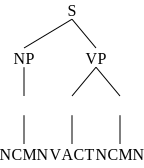

In [4]:
svgling.draw_tree(conlltags2tree(test("แมวกินปลา")))

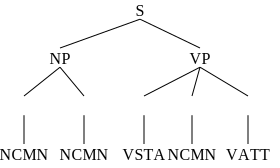

In [5]:
svgling.draw_tree(conlltags2tree(test("คนหนองคายเป็นคนน่ารัก")))

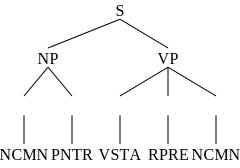

In [6]:
svgling.draw_tree(conlltags2tree(test("ปลาอะไรอยู่ในน้ำ")))

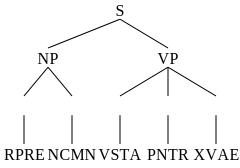

In [7]:
svgling.draw_tree(conlltags2tree(test("ในน้ำมีอะไรอยู่")))

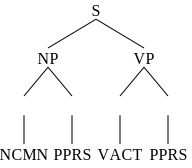

In [8]:
svgling.draw_tree(conlltags2tree(test("ทำไมเขารักคุณ")))

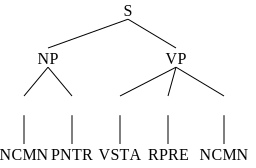

In [9]:
svgling.draw_tree(conlltags2tree(test("คนอะไรอยู่หลังต้นไม้")))